In [26]:
# Fourier transform of option values
# Merton's jump-diffusion model
# v: variable; r: interest rate; T: maturity; mu: mean of jump distribution; delta: standard deviation of jump

import numpy as np
import cmath

volatility = 0.2
jumpintensity = 5
mu = -0.1
delta = 0.1
T = 0.5
r = 0
#vol_BS = 0.3575

drift = jumpintensity*(1-cmath.exp(mu+(delta**2)/2)) - 0.5*volatility**2

#print (drift)

def char_func_Merton(u):  #characteristic exponent of Merton
    phi  = u*drift*1j - 0.5*(volatility**2)*(u**2) + jumpintensity*(cmath.exp(u*mu*1j-(delta**2)*(u**2)/2)-1)
    phi_M = cmath.exp(T*phi)
    return phi_M

#print (charMerton(1-1j))

def char_func_BS(u,vol_BS):  #characteristic function of BS
    phi_BS = cmath.exp(-0.5*(vol_BS**2)*T*(u**2+u*1j))
    return phi_BS
#print (charBS(1-1j))

def fourier(v,vol_BS):
    fouriertrans = cmath.exp(v*r*T*1j)*(char_func_Merton(v-1j)-char_func_BS(v-1j,vol_BS))/(v*1j*(1+v*1j))
    return fouriertrans
#print (fourier(1))


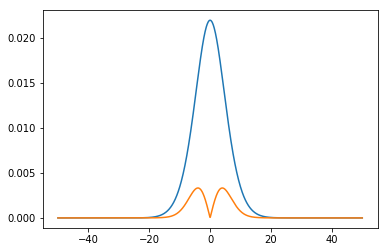

In [27]:
# draw the fourier transform function
%matplotlib inline
import matplotlib.pyplot as plt
x = np.linspace(-50, 50, 1000, endpoint=True)
f2 = np.vectorize(fourier)

plt.plot(x, np.abs(f2(x,0.2)))
plt.plot(x, np.abs(f2(x,0.3575)))
plt.show()

In [64]:
# use FFT algorithm to calculate the option price
N = 4048 #number of samplepoints
d = 0.01 #log strike step
L = 2*np.pi*(N-1)/(d*N)
k0 = 0 #initial log strike
vol_BS = 0.1

def log_strike(n):
    k = k0+d*n
    return k

Delta = L/(N-1)
w = 0  # discretize method weight

f = []
for m in range(0,N):
    v = -L/2 + m*Delta
    y1 = fourier(v,vol_BS)
    y2 = cmath.exp(-m*k0*Delta*1j)
    if m == 0 or m == N-1: w = 0.5
    else: w = 1
    f.append(w*y1*y2)
#print(f)
#print(np.fft.fft(f))
#DFT_f = np.fft.fft(f)

def DFT_f(n):
    dft = 0
    for m in range(0,N):
        dft = dft + f[m]*cmath.exp(-2*np.pi*1j*n*m/N)
    return dft
#print (DFT_f(0))

def z_T(n):
    z1 = L*cmath.exp(log_strike(n)*L*1j/2)/(2*np.pi*(N-1))
    z = z1*DFT_f(n)
    return z
print (np.abs(z_T(0)),np.abs(z_T(1)))

#x = np.arange(k0, log_strike(N), d)
n = np.arange(0,N,1)
z2 = np.vectorize(z_T)
#plt.plot(n, np.abs(z_T(n)))

#print (z_T(n))
#plt.plot(x, z_T(n))
plt.show()



0.07247493762391767 0.07226797871588822


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  app.launch_new_instance()


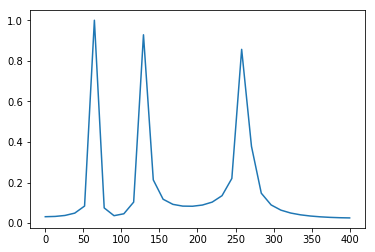

In [22]:
# plot FFT
from scipy.fftpack import fft, ifft

# Number of samplepoints
N = 64
Tn = 1/64.0

x = np.linspace(0, 2*np.pi*N*Tn, N)
y1 = np.cos(20*x)
y2 = np.sin(10*x)
y3 = np.sin(5*x)

y = y1+y2+y3

fy = fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)

plt.plot(xf, (2.0/N)*np.abs(fy[:N//2]))
plt.show()